# Homework Assignment 2, Problem 1

Practice analytic skills using Excel and Python. 

## Preliminaries

In [49]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import commonly used libraries and magic command for inline plotting. Also import the whatif.py file since we will need the classes to allow inheritance for our newly-created classes below.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from whatif import Model
from whatif import get_sim_results_df
from numpy.random import default_rng
from scipy import stats

In [51]:
%matplotlib inline

## Work

This is where work gets done.

Manually copy the logs and save them in the data directory.
Create a BCM.xlsx file.

Analysis 1 - Basic Break Even Analysis
    Base Model: Credit to Prof. Isken for the class below

In [52]:
class SingleProductSPF(Model):
    """Base model"""
    def __init__(self, fixed_cost=5000, var_cost=100, selling_price=115, 
               spf_constant=4900, spf_linear=-35, spf_quadratic=0.06):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic
        self.demand = (spf_quadratic*selling_price*selling_price) + (spf_linear*selling_price) + spf_constant
        
    def order_cost(self):
        """Order cost"""
        return self.fixed_cost + (self.var_cost*self.demand)
    
    def revenue(self):
        """Revenue"""
        return (self.selling_price*self.demand)
    
    def profit(self):
        """Profit"""
        return (self.revenue() - self.order_cost())
    
    
    # The functions below will be used later on
    #  def update(self, param_dict)
    #  def data_table(self, scenario_inputs, outputs)

In [53]:
model = SingleProductSPF() # This will run the method above and assign it to model object
print(model)

print(f'Here is the demand : {model.demand}')

print(f'Here is the total cost : {model.order_cost()}')
    
print(f'Here is the total revenue : {model.revenue()}')

print(f'Here is the profit : {model.profit()}')


{'fixed_cost': 5000, 'var_cost': 100, 'selling_price': 115, 'spf_constant': 4900, 'spf_linear': -35, 'spf_quadratic': 0.06, 'demand': 1668.5}
Here is the demand : 1668.5
Here is the total cost : 171850.0
Here is the total revenue : 191877.5
Here is the profit : 20027.5


Create some data tables and to do some goal seeking, the structure of your model should be roughly similar to the BookstoreModel we did in the course notes.

Determine the breakeven level of sales, or the value of selling price that returns a profit of zero.

In [54]:
model_2 = SingleProductSPF(5000, 100, 102.575, 4900, -35, 0.06)
print(model_2.profit())

-1.4799434375017881


The selling price which will result in a profit of nearly zero is 102.575 or $102.57 (rounded down).

Create a one-way data table using data_table function to show how profit and demand are related to selling price. We can extend the functions from the existing whatif.py file. Profit and demand are the outputs and selling price is the input. Let price range from 80 to 140 in steps of $10.

In [55]:
model.selling_price = np.arange(80, 141, 10)
print(model.selling_price)

profit_array = model.profit()
print(profit_array)

inputs = {
    'selling_price': np.arange(80, 141, 10)
}

outputs = {
    'profit': profit_array,
}

model.data_table(inputs, outputs)

[ 80  90 100 110 120 130 140]
[-38370. -21685.  -5000.  11685.  28370.  45055.  61740.]


,selling_price,profit
0,80,-38370.0
1,90,-21685.0
2,100,-5000.0
3,110,11685.0
4,120,28370.0
5,130,45055.0
6,140,61740.0


Create a graph based on your data table object so that it is easy to visualize the relationship between selling price and profit.

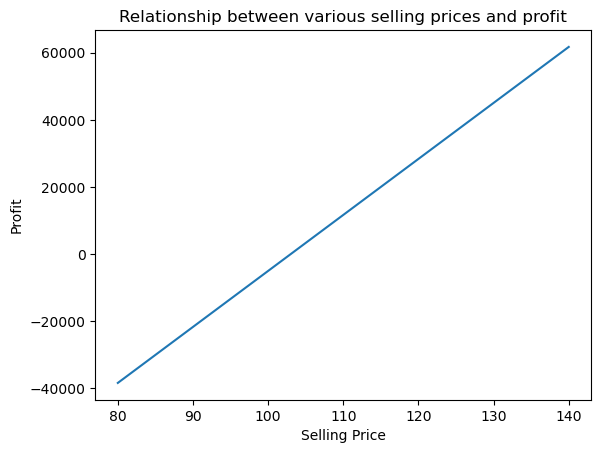

In [56]:
x = model.selling_price # X-axis
y = profit_array # Y-axis

# Plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('Selling Price')
# naming the y axis
plt.ylabel('Profit')
  
# giving a title to my graph
plt.title('Relationship between various selling prices and profit')
  
# function to show the plot
plt.show()

This is a linear function. The graph has this shape because as the selling price increases, the producer/vendor can charge more and thus results in more revenue and can lead to higher profit.

Use our goal_seek function to find the break even selling price between 80 and 140. 

In [57]:
break_even_price = model.goal_seek('profit', 0, 'selling_price', 80, 141, 1)
print(f'The break even selling price between $80 and $140 is {break_even_price}')

The break even selling price between $80 and $140 is 95.25


You are also interested in the sensitivity of profit AND total cost to different combinations of selling price and the variable production cost. So, create a 2-way data table using data_table  for these two input variables. Let price range from 80 to 140 in steps of 10 and let the variable production cost vary from 85 to 110 in steps of 5.

In [58]:
model.selling_price = np.arange(80, 141, 10)
print(model.selling_price)

profit_array = model.profit()
print(profit_array)

inputs = {
    'selling_price': np.arange(80, 141, 10),
    'var_cost': np.arange(85, 111, 5) 
}

outputs = {
    'profit': profit_array
}

model.data_table(inputs, outputs)

[ 80  90 100 110 120 130 140]
[-38370. -21685.  -5000.  11685.  28370.  45055.  61740.]


,selling_price,var_cost,profit
0,80,85,-13342.5
1,80,90,-21685.0
2,80,95,-30027.5
3,80,100,-38370.0
4,80,105,-46712.5
5,80,110,-55055.0
6,90,85,3342.5
7,90,90,-5000.0
8,90,95,-13342.5
9,90,100,-21685.0


Redo the Goal Seek but instead of using $80-$140 as your search range, use $80-$250. What happens? Why do you think this happens?

In [59]:
break_even_price = model.goal_seek('profit', 0, 'selling_price', 80, 251, 1)
print(f'The break even selling price between $80 and $140 is {break_even_price}')

The break even selling price between $80 and $140 is 122.75


The break even selling price has increased by $23.50 and this is because we have increased our range of selling prices so we have higher revenues to account for. 

Redo your 1-way data table and associated selling price vs profit plot but use $80-$250 as your input range. Now, why do you think that your Goal Seek failed?

In [60]:
model.selling_price = np.arange(80, 251, 10)
print(model.selling_price)

profit_array = model.profit()
print(profit_array)

inputs = {
    'selling_price': np.arange(80, 251, 10)
}

outputs = {
    'profit': profit_array,
}

model.data_table(inputs, outputs)

break_even_price = model.goal_seek('profit', 0, 'selling_price', 80, 251, 1)
print(f'The break even selling price between $80 and $140 is {break_even_price}')

[ 80  90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250]
[-38370. -21685.  -5000.  11685.  28370.  45055.  61740.  78425.  95110.
 111795. 128480. 145165. 161850. 178535. 195220. 211905. 228590. 245275.]
The break even selling price between $80 and $140 is 122.75


My goal seek may have failed because my profits are getting larger.

Let’s model it with a uniform distribution between (80, 120). 

Use our simulate function to simulate this and answer the following questions:
1. Create a histogram of profit
2. What is the probability that profit is negative based on our simulation?

(80, -38370.0)
(81, -36701.5)
(82, -35033.0)
(83, -33364.5)
(84, -31696.0)
(85, -30027.5)
(86, -28359.0)
(87, -26690.5)
(88, -25022.0)
(89, -23353.5)
(90, -21685.0)
(91, -20016.5)
(92, -18348.0)
(93, -16679.5)
(94, -15011.0)
(95, -13342.5)
(96, -11674.0)
(97, -10005.5)
(98, -8337.0)
(99, -6668.5)
(100, -5000.0)
(101, -3331.5)
(102, -1663.0)
(103, 5.5)
(104, 1674.0)
(105, 3342.5)
(106, 5011.0)
(107, 6679.5)
(108, 8348.0)
(109, 10016.5)
(110, 11685.0)
(111, 13353.5)
(112, 15022.0)
(113, 16690.5)
(114, 18359.0)
(115, 20027.5)
(116, 21696.0)
(117, 23364.5)
(118, 25033.0)
(119, 26701.5)
(120, 28370.0)
0.45855804438027437


(array([4., 4., 4., 4., 4., 4., 4., 4., 4., 5.]),
 array([-38370., -31696., -25022., -18348., -11674.,  -5000.,   1674.,
          8348.,  15022.,  21696.,  28370.]),
 <BarContainer object of 10 artists>)

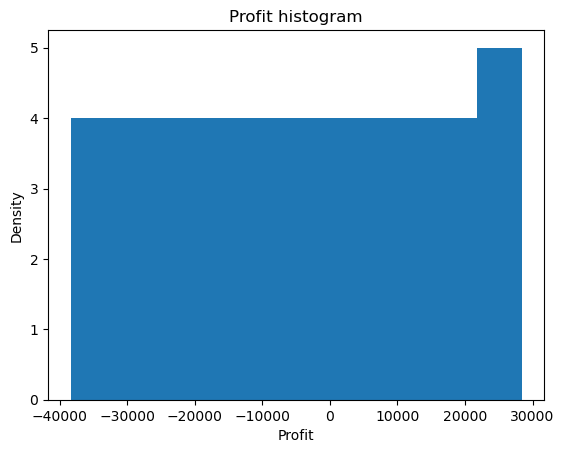

In [67]:
prices = model.selling_price = np.arange(80, 121, 1)
profit_array = model.profit()

for t in zip(prices, profit_array):
    print(t)
    
rg = default_rng(4470)
print(rg.random())
profit_distribution = rg.uniform(80, 121, 1)
rv_profit = stats.uniform(loc=7.0, scale=1.0)

plt.title("Profit histogram")
plt.xlabel("Profit")
plt.ylabel("Density")
plt.hist(profit_array)